## After feature selection done, here are the selected attributes: 


- 'YearBuilt'
- 'YearRemodAdd'  
- 'MasVnrArea'  
- 'TotalBsmtSF'  
- '1stFlrSF'
- 'GrLivArea' 
- 'Fireplaces' 
- 'GarageCars'
- 'OverallQual'
- 'ExterQual'
- 'BsmtQual'
- 'HeatingQC' 
- 'KitchenQual'
- 'FireplaceQu'
- 'MSZoning' 
- 'Street'  ---> Cancel
- 'Neighborhood'  ---> Cancel
- 'Condition2'
- 'RoofMatl'  ---> Cancel
- 'CentralAir' ---> Cancel
- 'GarageFinish' ---> cancel
- 'MiscFeature' --->cancel
- 'SalePrice'

 


#### 1. Read data

In [154]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

df = pd.read_csv('House_prediction_dataset/train.csv')

# The test set 
df_test = pd.read_csv('House_prediction_dataset/test.csv')

Y_test = pd.read_csv('House_prediction_dataset/sample_submission.csv')
Y_test = Y_test['SalePrice']

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_4956\1117006847.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


proccess the ordinal data that are filled with NA to Na to not be interpeted as Null or NaN by pandas

In [155]:
df["Alley"] =  df["Alley"].fillna("Na")
df["MasVnrType"] =  df["MasVnrType"].fillna("Na")
df["BsmtQual"] =  df["BsmtQual"].fillna("Na")
df["BsmtCond"] =  df["BsmtCond"].fillna("Na")
df["BsmtExposure"] =  df["BsmtExposure"].fillna("Na")
df["BsmtFinType1"] =  df["BsmtFinType1"].fillna("Na")
df["BsmtFinType2"] =  df["BsmtFinType2"].fillna("Na")

df["FireplaceQu"] =  df["FireplaceQu"].fillna("Na")
df["GarageType"] =  df["GarageType"].fillna("Na")
df["GarageFinish"] =  df["GarageFinish"].fillna("Na")
df["GarageQual"] =  df["GarageQual"].fillna("Na")
df["GarageCond"] =  df["GarageCond"].fillna("Na")
df["PoolQC"] =  df["PoolQC"].fillna("Na")
df["Fence"] =  df["Fence"].fillna("Na")
df["MiscFeature"] =  df["MiscFeature"].fillna("Na")

In [156]:
# df_test["Alley"] =  df_test["Alley"].fillna("Na")
# df_test["MasVnrType"] =  df_test["MasVnrType"].fillna("Na")
# df_test["BsmtQual"] =  df_test["BsmtQual"].fillna("Na")
# df_test["BsmtCond"] =  df_test["BsmtCond"].fillna("Na")
# df_test["BsmtExposure"] =  df_test["BsmtExposure"].fillna("Na")
# df_test["BsmtFinType1"] =  df_test["BsmtFinType1"].fillna("Na")
# df_test["BsmtFinType2"] =  df_test["BsmtFinType2"].fillna("Na")

# df_test["FireplaceQu"] =  df_test["FireplaceQu"].fillna("Na")
# df_test["GarageType"] =  df_test["GarageType"].fillna("Na")
# df_test["GarageFinish"] =  df_test["GarageFinish"].fillna("Na")
# df_test["GarageQual"] =  df_test["GarageQual"].fillna("Na")
# df_test["GarageCond"] =  df_test["GarageCond"].fillna("Na")
# df_test["PoolQC"] =  df_test["PoolQC"].fillna("Na")
# df_test["Fence"] =  df_test["Fence"].fillna("Na")
# df_test["MiscFeature"] =  df_test["MiscFeature"].fillna("Na")

In [157]:
# df = df.dropna()

keeping track of the attributes 

In [158]:
# The ordinal attributes 
od = ['OverallQual', 'ExterQual', 'BsmtQual','HeatingQC','KitchenQual', 'FireplaceQu']

# The numerical attributes 
num = ['YearBuilt',
'YearRemodAdd',
 'MasVnrArea',
 '1stFlrSF',
       'GrLivArea',
       'Fireplaces',
'TotalBsmtSF',
 'FullBath',
 'GarageCars']

# All the attributes 
attributes = ['YearBuilt','YearRemodAdd', 'MasVnrArea','TotalBsmtSF',
              '1stFlrSF','GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 
             'OverallQual','ExterQual', 'BsmtQual', 
              'Condition2','HeatingQC','MSZoning',
             'SalePrice','KitchenQual', 'FireplaceQu']

# feat = ['GarageArea','TotRmsAbvGrd',
#         'LotShape', 'LandContour', 'Utilities',
#        'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
#        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType',  'ExterCond', 'Foundation',
#        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#        'Heating',  'Electrical',
#        'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
#        'SaleType', 'SaleCondition']
print(len(attributes))
print(len(set(attributes)))

18
18


In [159]:
df[attributes].isna().sum()

YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
Fireplaces      0
GarageCars      0
OverallQual     0
ExterQual       0
BsmtQual        0
Condition2      0
HeatingQC       0
MSZoning        0
SalePrice       0
KitchenQual     0
FireplaceQu     0
dtype: int64

## Ordinal Encoding 

In [160]:
ordnial = df.copy()
enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','Na']])

ordnial['ExterQual'] = enc.fit_transform(ordnial.loc[:,['ExterQual']])
ordnial['ExterCond'] = enc.fit_transform(ordnial.loc[:,['ExterCond']])
ordnial['BsmtQual'] = enc.fit_transform(ordnial.loc[:,['BsmtQual']])
ordnial['BsmtCond'] = enc.fit_transform(ordnial.loc[:,['BsmtCond']])
ordnial['HeatingQC'] = enc.fit_transform(ordnial.loc[:,['HeatingQC']])
ordnial['KitchenQual'] = enc.fit_transform(ordnial.loc[:,['KitchenQual']])
ordnial['GarageQual'] = enc.fit_transform(ordnial.loc[:,['GarageQual']])
ordnial['GarageCond'] = enc.fit_transform(ordnial.loc[:,['GarageCond']])
ordnial['FireplaceQu'] = enc.fit_transform(ordnial.loc[:,['FireplaceQu']])
ordnial['PoolQC'] = enc.fit_transform(ordnial.loc[:,['PoolQC']])


enc = OrdinalEncoder(categories=[['GLQ','ALQ','BLQ','Rec','LwQ','Unf','Na']])
ordnial['BsmtFinType1'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType1']])
ordnial['BsmtFinType2'] = enc.fit_transform(ordnial.loc[:,['BsmtFinType2']])

enc = OrdinalEncoder(categories=[['Gd','Av','Mn','No','Na']])
ordnial['BsmtExposure'] = enc.fit_transform(ordnial.loc[:,['BsmtExposure']])

In [161]:
df[od] = ordnial[od]
df = df[attributes]

In [162]:
masv_area = df["MasVnrArea"].mean()
tot_bsmt = df['TotalBsmtSF'].mode()[0]
gara_car = df['GarageCars'].mode()[0]
Ms_zon = df['MSZoning'].mode()[0]


## Standerization of the numerical attributes 

In [163]:
scaler = StandardScaler()
X = df.copy()
Y = df['SalePrice']
X[num] = scaler.fit_transform(X[num])
# Y = X['SalePrice']
X["MasVnrArea"] = X["MasVnrArea"].fillna(masv_area)

In [164]:
att = attributes.copy()
att.remove('SalePrice')
X_test = df_test[att]
# X_test['SalePrice'] = Y_test
X_test.isna().sum()

YearBuilt         0
YearRemodAdd      0
MasVnrArea       15
TotalBsmtSF       1
1stFlrSF          0
GrLivArea         0
FullBath          0
Fireplaces        0
GarageCars        1
OverallQual       0
ExterQual         0
BsmtQual         44
Condition2        0
HeatingQC         0
MSZoning          4
KitchenQual       1
FireplaceQu     730
dtype: int64

Standerization of the test dataset

In [165]:
X_test[num] = scaler.transform(X_test[num])
# Y_test = X_test['SalePrice']
X_test


C:\Users\malkhathery\AppData\Local\Temp\ipykernel_4956\1061339431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num] = scaler.transform(X_test[num])


,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,Fireplaces,GarageCars,OverallQual,ExterQual,BsmtQual,Condition2,HeatingQC,MSZoning,KitchenQual,FireplaceQu
0,-0.340077,-1.156380,-0.572835,-0.400017,-0.689929,-1.179256,-1.026041,-0.951226,-1.026858,5,TA,TA,Norm,TA,RH,TA,NaN
1,-0.439440,-1.301740,0.023838,0.619239,0.430511,-0.354966,-1.026041,-0.951226,-1.026858,6,TA,TA,Norm,TA,RL,Gd,NaN
2,0.852269,0.636400,-0.572835,-0.295127,-0.607125,0.216136,0.789741,0.600495,0.311725,5,TA,Gd,Norm,Gd,RL,TA,TA
3,0.885390,0.636400,-0.462340,-0.299687,-0.612300,0.168544,0.789741,0.600495,0.311725,6,TA,TA,Norm,Ex,RL,Gd,Gd
4,0.686666,0.345679,-0.572835,0.507509,0.303718,-0.448246,0.789741,-0.951226,0.311725,8,Gd,Gd,Norm,Ex,RL,Gd,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.041991,-0.720298,-0.572835,-1.166169,-1.595596,-0.806136,-1.026041,-0.951226,-2.365440,4,TA,TA,Norm,Gd,RM,TA,NaN
1455,-0.041991,-0.720298,-0.572835,-1.166169,-1.595596,-0.806136,-1.026041,-0.951226,-1.026858,4,TA,TA,Norm,TA,RM,TA,NaN
1456,-0.373198,0.539493,-0.572835,0.379817,0.158811,-0.554851,-1.026041,0.600495,0.311725,5,TA,TA,Norm,Ex,RL,TA,TA
1457,0.686666,0.345679,-0.572835,-0.331610,-0.498445,-1.038384,-1.026041,-0.951226,-2.365440,5,TA,Gd,Norm,TA,RL,TA,NaN


In [166]:

X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(tot_bsmt) 

X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(masv_area) 
X_test['GarageCars'] = X_test['GarageCars'].fillna(gara_car) 
X_test['MSZoning'] = X_test['MSZoning'].fillna(Ms_zon) 
X_test.isna().sum()
# X_test.info()

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_4956\2699655139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(tot_bsmt)
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_4956\2699655139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(masv_area)
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_4956\2699655139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

YearBuilt         0
YearRemodAdd      0
MasVnrArea        0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
Fireplaces        0
GarageCars        0
OverallQual       0
ExterQual         0
BsmtQual         44
Condition2        0
HeatingQC         0
MSZoning          0
KitchenQual       1
FireplaceQu     730
dtype: int64

Order encoding of the test set 

In [167]:
enc = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','Na']])
X_test[od] = X_test[od].fillna('Na')

X_test['ExterQual'] = enc.fit_transform(X_test.loc[:,['ExterQual']])
X_test['BsmtQual'] = enc.fit_transform(X_test.loc[:,['BsmtQual']])
X_test['HeatingQC'] = enc.fit_transform(X_test.loc[:,['HeatingQC']])
X_test['KitchenQual'] = enc.fit_transform(X_test.loc[:,['KitchenQual']])
X_test['FireplaceQu'] = enc.fit_transform(X_test.loc[:,['FireplaceQu']])
X_test.isna().sum()

C:\Users\malkhathery\AppData\Local\Temp\ipykernel_4956\3835350673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[od] = X_test[od].fillna('Na')
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_4956\3835350673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ExterQual'] = enc.fit_transform(X_test.loc[:,['ExterQual']])
C:\Users\malkhathery\AppData\Local\Temp\ipykernel_4956\3835350673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
Fireplaces      0
GarageCars      0
OverallQual     0
ExterQual       0
BsmtQual        0
Condition2      0
HeatingQC       0
MSZoning        0
KitchenQual     0
FireplaceQu     0
dtype: int64

##### fill null values

## One-hot encoding of the both datasets alnog with algin

In [168]:
X = pd.get_dummies(data=X, drop_first=True)
X_test= pd.get_dummies(data=X_test, drop_first=True)
X, X_test = X.align(X_test, join='left', axis=1)
X_test = X_test.fillna(int(0))

In [169]:
X = X.drop(columns='SalePrice')


In [170]:
X_test = X_test.drop(columns='SalePrice')

In [171]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearBuilt         1460 non-null   float64
 1   YearRemodAdd      1460 non-null   float64
 2   MasVnrArea        1460 non-null   float64
 3   TotalBsmtSF       1460 non-null   float64
 4   1stFlrSF          1460 non-null   float64
 5   GrLivArea         1460 non-null   float64
 6   FullBath          1460 non-null   float64
 7   Fireplaces        1460 non-null   float64
 8   GarageCars        1460 non-null   float64
 9   OverallQual       1460 non-null   int64  
 10  ExterQual         1460 non-null   float64
 11  BsmtQual          1460 non-null   float64
 12  HeatingQC         1460 non-null   float64
 13  KitchenQual       1460 non-null   float64
 14  FireplaceQu       1460 non-null   float64
 15  Condition2_Feedr  1460 non-null   uint8  
 16  Condition2_Norm   1460 non-null   uint8  


In [172]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YearBuilt         1459 non-null   float64
 1   YearRemodAdd      1459 non-null   float64
 2   MasVnrArea        1459 non-null   float64
 3   TotalBsmtSF       1459 non-null   float64
 4   1stFlrSF          1459 non-null   float64
 5   GrLivArea         1459 non-null   float64
 6   FullBath          1459 non-null   float64
 7   Fireplaces        1459 non-null   float64
 8   GarageCars        1459 non-null   float64
 9   OverallQual       1459 non-null   int64  
 10  ExterQual         1459 non-null   float64
 11  BsmtQual          1459 non-null   float64
 12  HeatingQC         1459 non-null   float64
 13  KitchenQual       1459 non-null   float64
 14  FireplaceQu       1459 non-null   float64
 15  Condition2_Feedr  1459 non-null   uint8  
 16  Condition2_Norm   1459 non-null   uint8  


In [173]:
import tensorflow as tf

output_size = 1
X_train_ten = tf.convert_to_tensor(X)
Y_train_ten = tf.convert_to_tensor(Y)

In [190]:
models = tf.keras.Sequential(
                            [
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.4),
                             tf.keras.layers.Dense(265,activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.4),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.3),
                             tf.keras.layers.Dense(1)  
                            ])

# layers.Dense(units=512, activation='relu', input_shape=[3179]),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(units=256, activation='relu', input_shape=[3179]),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(units=128, activation='relu', input_shape=[3179]),
#     layers.Dropout(rate = 0.3),
#     layers.Dense(1)
#     ,kernel_regularizer=tf.keras.regularizers.L1(0.8)
custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
models.compile(optimizer=custom_optimizer,loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae'])
# print (models.summary())
models.fit(X_train_ten,Y_train_ten,epochs=200,verbose=1)

Epoch 1/200
46/46 [==============================] - 0s 2ms/step - loss: 18006341632.0000 - rmse: 134187.7031 - mae: 99628.8984
Epoch 2/200
46/46 [==============================] - 0s 2ms/step - loss: 2430378752.0000 - rmse: 49298.8711 - mae: 34279.3984
Epoch 3/200
46/46 [==============================] - 0s 2ms/step - loss: 2216805376.0000 - rmse: 47082.9609 - mae: 30773.5664
Epoch 4/200
46/46 [==============================] - 0s 2ms/step - loss: 2025641600.0000 - rmse: 45007.1289 - mae: 29335.9023
Epoch 5/200
46/46 [==============================] - 0s 2ms/step - loss: 2120929920.0000 - rmse: 46053.5547 - mae: 29210.8496
Epoch 6/200
46/46 [==============================] - 0s 2ms/step - loss: 1939880192.0000 - rmse: 44044.0703 - mae: 29154.9805
Epoch 7/200
46/46 [==============================] - 0s 2ms/step - loss: 1751760640.0000 - rmse: 41854.0391 - mae: 28067.7832
Epoch 8/200
46/46 [==============================] - 0s 2ms/step - loss: 1677680896.0000 - rmse: 40959.5039 - mae: 2

46/46 [==============================] - 0s 2ms/step - loss: 1320699520.0000 - rmse: 36341.4297 - mae: 26416.2734
Epoch 66/200
46/46 [==============================] - 0s 2ms/step - loss: 1322054016.0000 - rmse: 36360.0625 - mae: 26395.0273
Epoch 67/200
46/46 [==============================] - 0s 3ms/step - loss: 1289456128.0000 - rmse: 35908.9961 - mae: 26119.3047
Epoch 68/200
46/46 [==============================] - 0s 3ms/step - loss: 1398880384.0000 - rmse: 37401.6094 - mae: 26312.7227
Epoch 69/200
46/46 [==============================] - 0s 4ms/step - loss: 1442986496.0000 - rmse: 37986.6602 - mae: 27021.3105
Epoch 70/200
46/46 [==============================] - 0s 4ms/step - loss: 1360672128.0000 - rmse: 36887.2891 - mae: 26322.5762
Epoch 71/200
46/46 [==============================] - 0s 4ms/step - loss: 1424566656.0000 - rmse: 37743.4336 - mae: 26603.2129
Epoch 72/200
46/46 [==============================] - 0s 3ms/step - loss: 1551763200.0000 - rmse: 39392.4258 - mae: 27915.80

46/46 [==============================] - 0s 2ms/step - loss: 1249237632.0000 - rmse: 35344.5547 - mae: 26161.4551
Epoch 130/200
46/46 [==============================] - 0s 2ms/step - loss: 1255082752.0000 - rmse: 35427.1484 - mae: 25544.3867
Epoch 131/200
46/46 [==============================] - 0s 2ms/step - loss: 1147525120.0000 - rmse: 33875.1406 - mae: 24991.3184
Epoch 132/200
46/46 [==============================] - 0s 2ms/step - loss: 1280851584.0000 - rmse: 35788.9883 - mae: 25622.6953
Epoch 133/200
46/46 [==============================] - 0s 2ms/step - loss: 1218898560.0000 - rmse: 34912.7266 - mae: 25527.6309
Epoch 134/200
46/46 [==============================] - 0s 2ms/step - loss: 1251515904.0000 - rmse: 35376.7695 - mae: 25181.6172
Epoch 135/200
46/46 [==============================] - 0s 2ms/step - loss: 1244312704.0000 - rmse: 35274.8164 - mae: 25539.3145
Epoch 136/200
46/46 [==============================] - 0s 2ms/step - loss: 1235686912.0000 - rmse: 35152.3398 - mae: 2

46/46 [==============================] - 0s 2ms/step - loss: 1162146176.0000 - rmse: 34090.2656 - mae: 25024.3965
Epoch 194/200
46/46 [==============================] - 0s 2ms/step - loss: 1162150400.0000 - rmse: 34090.3281 - mae: 24735.2949
Epoch 195/200
46/46 [==============================] - 0s 2ms/step - loss: 1054950656.0000 - rmse: 32480.0039 - mae: 23887.8770
Epoch 196/200
46/46 [==============================] - 0s 2ms/step - loss: 1075985280.0000 - rmse: 32802.2148 - mae: 24119.3828
Epoch 197/200
46/46 [==============================] - 0s 2ms/step - loss: 1288135552.0000 - rmse: 35890.6055 - mae: 25757.9785
Epoch 198/200
46/46 [==============================] - 0s 2ms/step - loss: 1131130752.0000 - rmse: 33632.2891 - mae: 24529.3262
Epoch 199/200
46/46 [==============================] - 0s 2ms/step - loss: 1126416896.0000 - rmse: 33562.1367 - mae: 24182.5938
Epoch 200/200
46/46 [==============================] - 0s 2ms/step - loss: 1286942336.0000 - rmse: 35873.9805 - mae: 2

In [191]:
X_test_ten = tf.convert_to_tensor(X_test)
Y_test_ten = tf.convert_to_tensor(Y_test)

models.evaluate(X_test_ten,Y_test_ten)

46/46 [==============================] - 0s 1ms/step - loss: 6066136576.0000 - rmse: 77885.4062 - mae: 58654.2305


[6066136576.0, 77885.40625, 58654.23046875]

In [192]:
y_test_pred = models.predict(X_test_ten)

46/46 [==============================] - 0s 867us/step


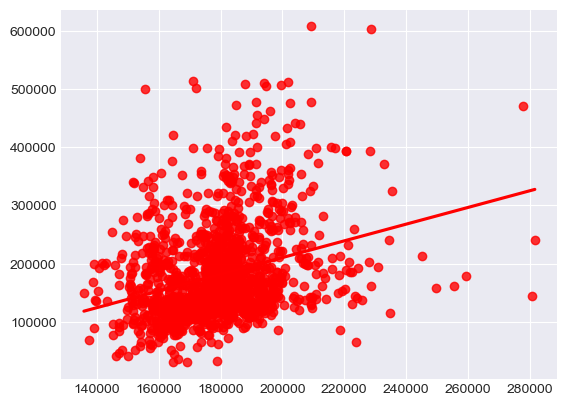

In [193]:
sns.regplot(x=Y_test_ten,y=y_test_pred,ci=None,color ='red');

In [194]:
y_test_pred.shape

(1459, 1)

In [195]:
Y_test_ten.shape

TensorShape([1459])

In [196]:
Y_test_ten = tf.reshape(Y_test_ten, [1459,1])

In [197]:
import tensorflow_addons as tfa
metric = tfa.metrics.r_square.RSquare()
metric.update_state(Y_test_ten, y_test_pred)
result = metric.result()
result.numpy()

-21.247171

## overfitteing detected

#### Dimentionality reduction